### Puheentunnistus
Nauhoitimme kolme ääninäytettä. Yhdessä on eri puhuja, ja yhdessä on taustamelua. Yksi on selkeä.

In [2]:
import torch
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio, display
from transformers import WhisperProcessor, WhisperForConditionalGeneration

# Set the audio filename - update this to your actual filename
audio_file1 = "NäyteIlmanMelua.wav"
audio_file2 = "LauseTaustaMelulla.wav"
audio_file3 = "MironLause.wav"

# conda install -c conda-forge transformers
# conda install -c conda-forge librosa
# conda install -c conda-forge ipywidgets
# conda install -c conda-forge libsndfile
# pip install PySoundFile
# conda install -c conda-forge sentencepiece
# conda install -c conda-forge sacremoses

/home/aarni/anaconda3/envs/keras/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-04-25 14:52:30.296969: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745581950.400711    1859 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745581950.428027    1859 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745581950.658295    1859 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than o

In [3]:
# Load audio file
y1, sr1 = librosa.load(audio_file1, sr=16000)
y2, sr2 = librosa.load(audio_file2, sr=16000)
y3, sr3 = librosa.load(audio_file3, sr=16000)

# Display audio for playback
print("Play the audio:")
display(Audio(y1, rate=sr1))
display(Audio(y2, rate=sr2))
display(Audio(y3, rate=sr3))

Play the audio:


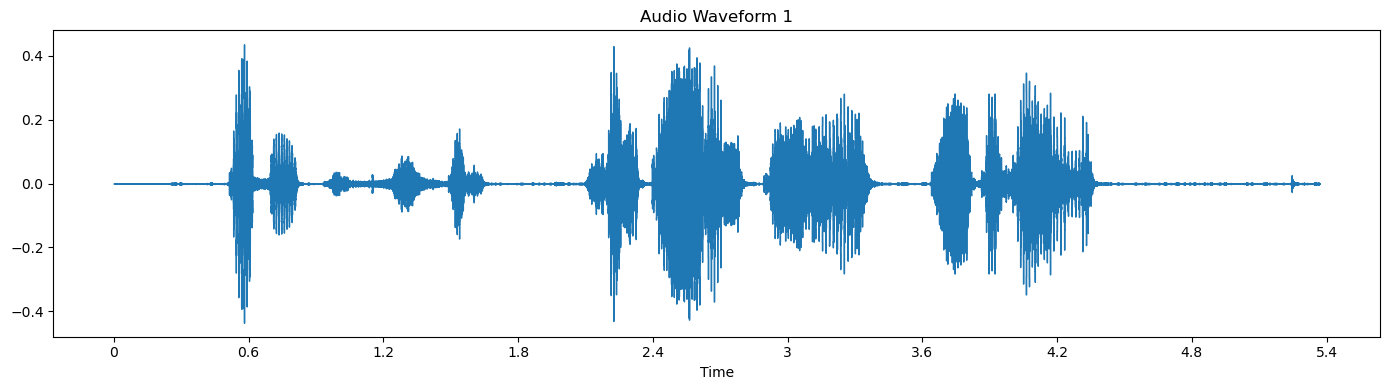

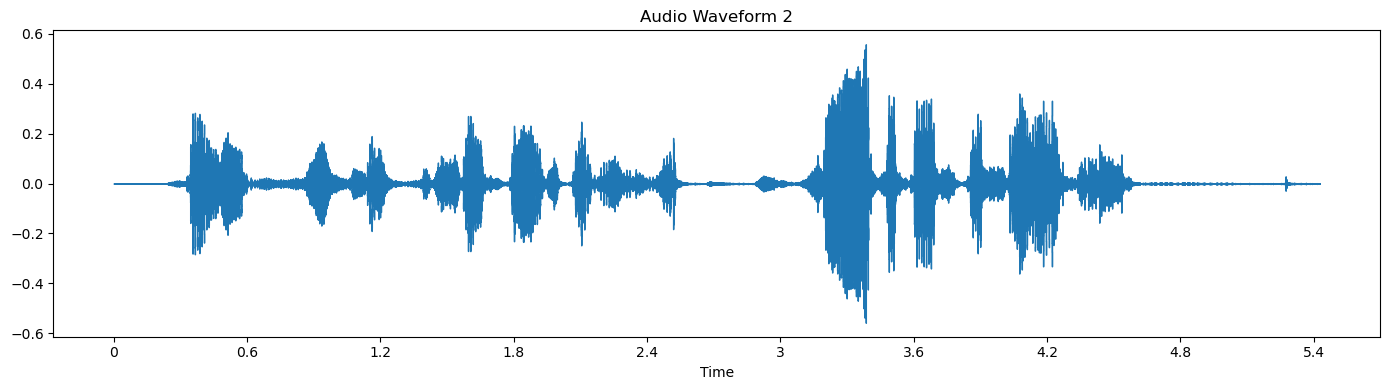

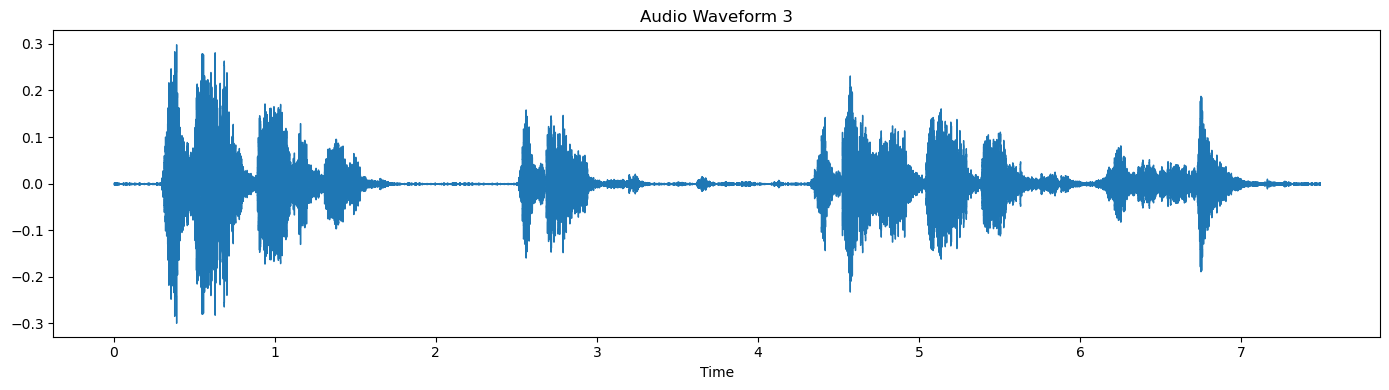

In [4]:
# Plot waveform
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y1, sr=sr1)
plt.title('Audio Waveform 1')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 4))
librosa.display.waveshow(y2, sr=sr2)
plt.title('Audio Waveform 2')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 4))
librosa.display.waveshow(y3, sr=sr3)
plt.title('Audio Waveform 3')
plt.tight_layout()
plt.show()


### Esikoulutetut Whisper -mallit
Luomme kaksi eri whisper mallia. Medium ja Large.

In [5]:
# Load the medium Whisper model and processor
def load_medium_whisper_model(device=None):
    if device is None:
        device = "cuda" if torch.cuda.is_available() else "cpu"
    print(f"Using device: {device}")
    
    model_name = "openai/whisper-medium"
    print(f"Loading Whisper medium model...")
    processor = WhisperProcessor.from_pretrained(model_name)
    model = WhisperForConditionalGeneration.from_pretrained(model_name).to(device)
    
    return processor, model, device

# Initialize the medium model
medium_processor, medium_model, medium_device = load_medium_whisper_model()

Using device: cuda
Loading Whisper medium model...


In [6]:
# Large Whisper Model
# Load the large Whisper model and processor
def load_large_whisper_model(device=None):
    if device is None:
        device = "cuda" if torch.cuda.is_available() else "cpu"
    print(f"Using device: {device}")
    
    model_name = "openai/whisper-large"
    print(f"Loading Whisper large model...")
    processor = WhisperProcessor.from_pretrained(model_name)
    model = WhisperForConditionalGeneration.from_pretrained(model_name).to(device)
    
    return processor, model, device

# Initialize the large model
large_processor, large_model, large_device = load_large_whisper_model()

Using device: cuda
Loading Whisper large model...


Funktio kirjoittaa äänitiedoston sisällön. Siihen annetaan sisään äänitiedoston lisäksi kieli, ja toinen edellä tehdyistä äänimalleista.

In [7]:
# Reuse models for transcription
def transcribe_audio_with_model(audio_data, sample_rate, processor, model, device, language="fi"):
    """
    Transcribe audio using a preloaded Whisper model.
    
    Args:
        audio_data: Audio data as numpy array
        sample_rate: Sample rate of the audio
        processor: WhisperProcessor instance
        model: WhisperForConditionalGeneration instance
        device: Compute device
        language: Language code for transcription
    
    Returns:
        transcription: Text transcription of the audio
    """
    # Set the language and task
    forced_decoder_ids = processor.get_decoder_prompt_ids(language=language, task="transcribe")
    
    # Process with WhisperProcessor
    print("Processing audio...")
    input_features = processor(
        audio_data, 
        sampling_rate=sample_rate, 
        return_tensors="pt"
    ).input_features.to(device)
    
    # Generate the transcription
    print("Generating transcription...")
    with torch.no_grad():
        generated_ids = model.generate(
            input_features,
            forced_decoder_ids=forced_decoder_ids
        )
    
    # Decode the generated IDs
    transcription = processor.batch_decode(
        generated_ids, 
        skip_special_tokens=True
    )[0]
    
    return transcription, input_features

In [10]:
# Example usage with medium and large models
print("\nTranscribing with medium model...")
transcription1_medium, input_features1 = transcribe_audio_with_model(y1, sr1, medium_processor, medium_model, medium_device)
print("Transcription 1 (Medium Model):")
print("="*50)
print(transcription1_medium)

print("\nTranscribing with medium model...")
transcription2_medium, input_features2 = transcribe_audio_with_model(y2, sr2, medium_processor, medium_model, medium_device)
print("Transcription 2 (Medium Model):")
print("="*50)
print(transcription2_medium)

print("\nTranscribing with medium model...")
transcription3_medium, input_features3 = transcribe_audio_with_model(y3, sr3, medium_processor, medium_model, medium_device)
print("Transcription 3 (Medium Model):")
print("="*50)
print(transcription3_medium)

print("\nTranscribing with large model...")
transcription3_large, input_features3_large = transcribe_audio_with_model(y3, sr3, large_processor, large_model, large_device)
print("Transcription (Large Model):")
print("="*50)
print(transcription3_large)


Transcribing with medium model...
Processing audio...
Generating transcription...
Transcription 1 (Medium Model):
 Tämä on lause. Sen äänen kuulee, eikö vain.

Transcribing with medium model...
Processing audio...
Generating transcription...
Transcription 2 (Medium Model):
 Tämä on lause, missä on taustahälyä. Saako tästä selvää?

Transcribing with medium model...
Processing audio...
Generating transcription...
Transcription 3 (Medium Model):
 Jafarin taikasormi. Osa 1. Jafarilla on suuri taikasormi.

Transcribing with large model...
Processing audio...
Generating transcription...
Transcription (Large Model):
 Jafarin taigasormi. Osa 1. Jafarilla on suuri taigasormi.


Mielenkiintoisesti suuri malli kirjoitti taikasormen väärin.

### Seuraavaksi käännetään tekstiä

In [12]:
def translate_text_fi_en(processor, model, input_features):
    """
    Translate Finnish text to English using Whisper model
    
    Args:
        transcription: Finnish text to translate
        processor: WhisperProcessor instance
        model: WhisperForConditionalGeneration instance
        input_features: Input features for the model
    
    Returns:
        translation: Translated English text
    """
    # Set the task to translate
    forced_decoder_ids_translate = processor.get_decoder_prompt_ids(language="fi", task="translate")

    # Generate the translation
    print("Generating English translation...")
    with torch.no_grad():
        generated_ids = model.generate(
            input_features,
            forced_decoder_ids=forced_decoder_ids_translate
        )

    # Decode the generated IDs
    translation = processor.batch_decode(
        generated_ids, 
        skip_special_tokens=True
    )[0]

    return translation

In [13]:
# Translate the three transcriptions to English
translation1 = translate_text_fi_en(medium_processor, medium_model, input_features1)
print("\nENGLISH TRANSLATION (File 1):")
print("="*50)
print(translation1)

translation2 = translate_text_fi_en(medium_processor, medium_model, input_features2)
print("\nENGLISH TRANSLATION (File 2):")
print("="*50)
print(translation2)

translation3 = translate_text_fi_en(medium_processor, medium_model, input_features3)
print("\nENGLISH TRANSLATION (File 3):")
print("="*50)
print(translation3)

translation3_large = translate_text_fi_en(large_processor, large_model, input_features3_large)
print("\nENGLISH TRANSLATION (File 3 with large model):")
print("="*50)
print(translation3_large)

Generating English translation...

ENGLISH TRANSLATION (File 1):
 This is a sentence. You can hear its voice, can't you?
Generating English translation...

ENGLISH TRANSLATION (File 2):
 This is a sentence with a background noise. Can you see this?
Generating English translation...

ENGLISH TRANSLATION (File 3):
 Jafar's magic finger, part 1 Jafar has a big magic finger
Generating English translation...

ENGLISH TRANSLATION (File 3 with large model):
 Jafar's magic finger Part 1 Jafar has a big magic finger


Teksin kääntö näyttää onnistuvan hyvin